# Proyecto Daniel procesos II




## Drive y librerias

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans # KMeans clustering
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.datasets import make_blobs

import glob
import os

import functools
from functools import reduce

## Datos control - Sanos Datos con Deterioro

In [ ]:
df1= pd.read_csv(r'/content/drive/MyDrive/Universidad/9Noveno/Procesos II/CN.tsv') #Sanos
df2= pd.read_csv(r'/content/drive/MyDrive/Universidad/9Noveno/Procesos II/MCI.tsv') #Deterioro
df1['label']=0 #Sanos
df2['label']=1 #Deterioro

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12358 entries, 0 to 12357
Columns: 2394 entries, Unnamed: 0 to label
dtypes: float64(2392), int64(2)
memory usage: 225.7 MB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 2394 entries, Unnamed: 0 to label
dtypes: float64(2392), int64(2)
memory usage: 333.8 MB


## EDA

In [ ]:
df1.describe()

,Unnamed: 0,rh_bankssts_curvind,rh_caudalanteriorcingulate_curvind,rh_caudalmiddlefrontal_curvind,rh_cuneus_curvind,rh_entorhinal_curvind,rh_fusiform_curvind,rh_inferiorparietal_curvind,rh_inferiortemporal_curvind,rh_isthmuscingulate_curvind,...,rh_27_foldind,rh_28_foldind,rh_29_foldind,rh_30_foldind,rh_31_foldind,rh_32_foldind,rh_33_foldind,rh_34_foldind,rh_35_foldind,label
count,12358.000000,12358.000000,12358.000000,12358.000000,12358.000000,12358.000000,12358.000000,12358.000000,12358.000000,12358.000000,...,12358.000000,12358.000000,12358.000000,12358.000000,12358.000000,12358.000000,12358.000000,12358.000000,12358.000000,12358.0
mean,83.000000,0.012300,0.013141,0.041390,0.042547,0.008707,0.062000,0.105834,0.067260,0.018514,...,0.693016,0.656863,0.638085,0.677053,0.632703,0.618054,0.693082,0.498695,0.718033,0.0
std,48.209834,0.109761,0.115521,0.365226,0.368511,0.083241,0.537465,0.928932,0.586813,0.161887,...,5.958063,5.640279,5.531940,5.855830,5.436580,5.314772,6.001371,4.335359,6.340192,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,83.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,125.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,166.000000,2.000000,1.700000,5.200000,5.200000,2.900000,7.900000,13.700000,9.600000,2.200000,...,76.622200,66.058700,84.766900,76.802000,69.445100,63.017000,92.061900,66.527900,117.380400,0.0


In [ ]:
df2.describe()

,Unnamed: 0,lh_bankssts_area,lh_caudalanteriorcingulate_area,lh_caudalmiddlefrontal_area,lh_cuneus_area,lh_entorhinal_area,lh_fusiform_area,lh_inferiorparietal_area,lh_inferiortemporal_area,lh_isthmuscingulate_area,...,rh_27_volume,rh_28_volume,rh_29_volume,rh_30_volume,rh_31_volume,rh_32_volume,rh_33_volume,rh_34_volume,rh_35_volume,label
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.0
mean,123.000000,12.455356,8.162545,28.879035,20.116862,5.672776,40.665062,56.016796,44.786410,13.691651,...,75.813935,89.596126,68.549989,48.001116,46.992548,4.392893,6.672475,4.276655,30.949601,1.0
std,71.304124,107.357746,71.211883,250.448975,173.426327,49.416500,349.634672,483.160686,385.985583,118.598292,...,654.261230,772.201125,589.583758,412.188341,404.173245,37.909027,57.468371,36.791054,266.530415,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,123.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,185.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,246.000000,1294.000000,933.000000,3314.000000,2008.000000,632.000000,3854.000000,5724.000000,4203.000000,1711.000000,...,7372.000000,8763.000000,6385.100000,4457.600000,4404.800000,443.200000,638.300000,440.100000,3000.900000,1.0


In [ ]:
columns_names1 = df1.columns.values
columns_names2 = df1.columns.values

In [ ]:
corr_matrix1 = df1[columns_names1[0:8]].corr() # correlation function
corr_matrix1.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,rh_bankssts_curvind,rh_caudalanteriorcingulate_curvind,rh_caudalmiddlefrontal_curvind,rh_cuneus_curvind,rh_entorhinal_curvind,rh_fusiform_curvind,rh_inferiorparietal_curvind
Unnamed: 0,1.000000,-0.007399,0.004792,-0.005129,-0.002328,0.002523,0.000965,-0.002441
rh_bankssts_curvind,-0.007399,1.000000,0.944470,0.965757,0.954754,0.885520,0.970346,0.979783
rh_caudalanteriorcingulate_curvind,0.004792,0.944470,1.000000,0.941480,0.973201,0.878137,0.967939,0.957473
rh_caudalmiddlefrontal_curvind,-0.005129,0.965757,0.941480,1.000000,0.955385,0.900926,0.969882,0.973261
rh_cuneus_curvind,-0.002328,0.954754,0.973201,0.955385,1.000000,0.882435,0.975005,0.972024
rh_entorhinal_curvind,0.002523,0.885520,0.878137,0.900926,0.882435,1.000000,0.887970,0.897626
rh_fusiform_curvind,0.000965,0.970346,0.967939,0.969882,0.975005,0.887970,1.000000,0.985123
rh_inferiorparietal_curvind,-0.002441,0.979783,0.957473,0.973261,0.972024,0.897626,0.985123,1.000000


In [ ]:
corr_matrix2 = df2[columns_names1[0:8]].corr() # correlation function
corr_matrix2.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,rh_bankssts_curvind,rh_caudalanteriorcingulate_curvind,rh_caudalmiddlefrontal_curvind,rh_cuneus_curvind,rh_entorhinal_curvind,rh_fusiform_curvind,rh_inferiorparietal_curvind
Unnamed: 0,1.000000,-0.000297,0.000601,0.008487,0.003123,0.001643,-0.000346,0.002184
rh_bankssts_curvind,-0.000297,1.000000,0.928372,0.935557,0.959855,0.771216,0.952542,0.959908
rh_caudalanteriorcingulate_curvind,0.000601,0.928372,1.000000,0.934120,0.960866,0.839170,0.954503,0.955933
rh_caudalmiddlefrontal_curvind,0.008487,0.935557,0.934120,1.000000,0.966122,0.792270,0.973714,0.963205
rh_cuneus_curvind,0.003123,0.959855,0.960866,0.966122,1.000000,0.829728,0.982317,0.978517
rh_entorhinal_curvind,0.001643,0.771216,0.839170,0.792270,0.829728,1.000000,0.818161,0.808134
rh_fusiform_curvind,-0.000346,0.952542,0.954503,0.973714,0.982317,0.818161,1.000000,0.982168
rh_inferiorparietal_curvind,0.002184,0.959908,0.955933,0.963205,0.978517,0.808134,0.982168,1.000000


## Principal Component Analysis (PCA) - Kmeans



**PCA**

In [ ]:
df1_std = StandardScaler().fit_transform(df1)
df2_std = StandardScaler().fit_transform(df2)

In [ ]:
pca1 = PCA()
pca1.fit(df1_std)

pca2 = PCA()
pca2.fit(df2_std)

PCA()

In [ ]:
pca1_evr = pca1.explained_variance_ratio_
x_simulated1 = np.array(range(0, pca1_evr.shape[0]))

pca2_evr = pca2.explained_variance_ratio_
x_simulated2 = np.array(range(0, pca2_evr.shape[0]))

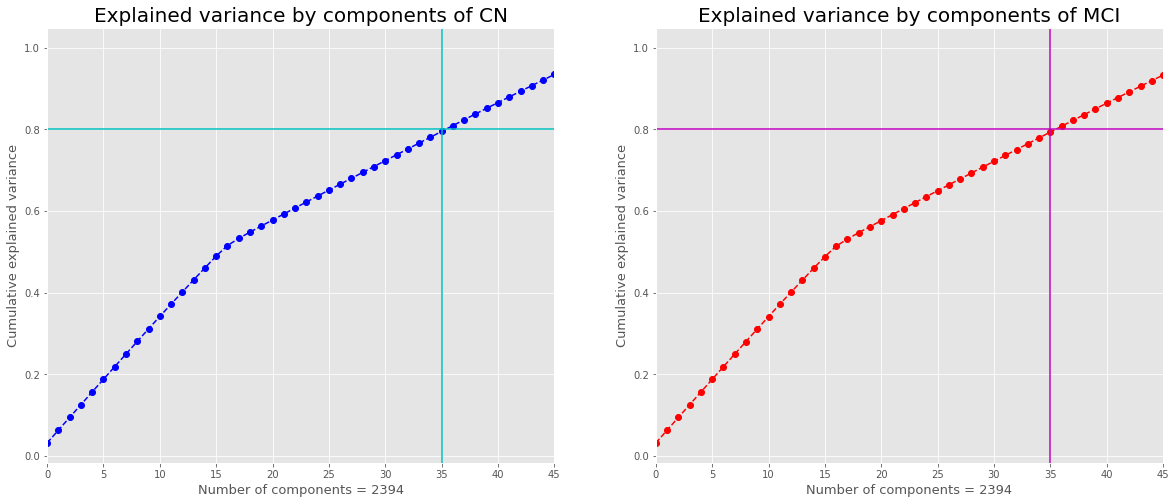

In [ ]:
#Plot the variance explained to know the number of components to choose
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.plot(x_simulated1, pca1_evr.cumsum(), marker = 'o', linestyle = '--', color = 'b')
plt.axhline(y = 0.8, color = 'c', linestyle = '-')
idx1 = np.argwhere(np.diff(np.sign(pca1_evr.cumsum() - 0.8))).flatten()
plt.axvline(x = idx1, color = 'c', linestyle = '-')
plt.title('Explained variance by components of CN', fontsize = 20)
plt.xlabel('Number of components = {}'.format(pca1_evr.shape[0]), fontsize = 13)
plt.ylabel('Cumulative explained variance', fontsize = 13)
plt.xlim((0,idx1+10))

plt.subplot(1,2,2)
plt.plot(x_simulated2, pca2_evr.cumsum(), marker = 'o', linestyle = '--', color = 'r')
plt.axhline(y = 0.8, color = 'm', linestyle = '-')
idx2 = np.argwhere(np.diff(np.sign(pca2_evr.cumsum() - 0.8))).flatten()
plt.axvline(x = idx2, color = 'm', linestyle = '-')
plt.title('Explained variance by components of MCI', fontsize = 20)
plt.xlabel('Number of components = {}'.format(pca2_evr.shape[0]), fontsize = 13)
plt.ylabel('Cumulative explained variance', fontsize = 13)
plt.xlim((0,idx2+10))

plt.show()

In [ ]:
pca1 = PCA(n_components = idx1[0])
pca1.fit(df1_std)
df1_pca = pca1.transform(df1_std)

pca2 = PCA(n_components= idx2[0])
pca2.fit(df2_std)
df2_pca = pca2.transform(df2_std)

**K-means**

In [ ]:
wcss = []
wcss2 = []

for i in range(1,21):
    kmeans_pca1 = KMeans(n_clusters = i, init = 'random', n_init = 5, random_state = 109).fit(df1_pca)
    wcss.append(kmeans_pca1.inertia_)
    kmeans_pca2 = KMeans(n_clusters = i, init = 'random', n_init = 5, random_state = 109).fit(df2_pca)
    wcss2.append(kmeans_pca2.inertia_)

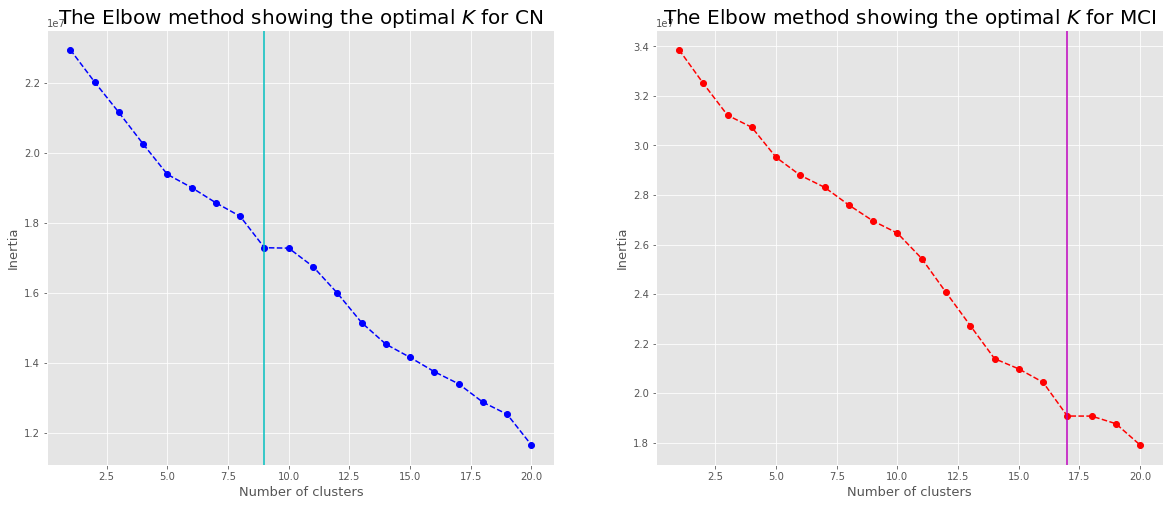

In [ ]:
#Plot the K's to choose
plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
plt.plot(range(1,len(wcss)+1),wcss, marker = 'o', linestyle = '--', color = 'b')
plt.axvline(x = 9, color = 'c', linestyle = '-')
plt.xlabel('Number of clusters', fontsize = 13)
plt.ylabel('Inertia', fontsize = 13)
plt.title('The Elbow method showing the optimal $K$ for CN', fontsize = 20)

plt.subplot(1,2,2)
plt.plot(range(1,len(wcss2)+1),wcss2, marker = 'o', linestyle = '--', color = 'r')
plt.axvline(x = 17, color = 'm', linestyle = '-')
plt.xlabel('Number of clusters', fontsize = 13)
plt.ylabel('Inertia', fontsize = 13)
plt.title('The Elbow method showing the optimal $K$ for MCI', fontsize = 20)

plt.show()

In [ ]:
kmeans_pca1 = KMeans(n_clusters = 9, init = 'random', n_init = 5, random_state = 109).fit(df1_pca)
kmeans_pca2 = KMeans(n_clusters = 17, init = 'random', n_init = 5, random_state = 109).fit(df2_pca)

In [ ]:
df1_pca_kmeans = pd.concat([df1, pd.DataFrame(df1_pca)], axis = 1)
df1_pca_kmeans['Segments k-means pca'] = kmeans_pca1.labels_

df2_pca_kmeans = pd.concat([df2, pd.DataFrame(df2_pca)], axis = 1)
df2_pca_kmeans['Segments k-means pca'] = kmeans_pca2.labels_

In [ ]:
df1_pca_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12358 entries, 0 to 12357
Columns: 2430 entries, Unnamed: 0 to Segments k-means pca
dtypes: float64(2427), int32(1), int64(2)
memory usage: 229.1 MB


Text(0, 0.5, 'Cluster')

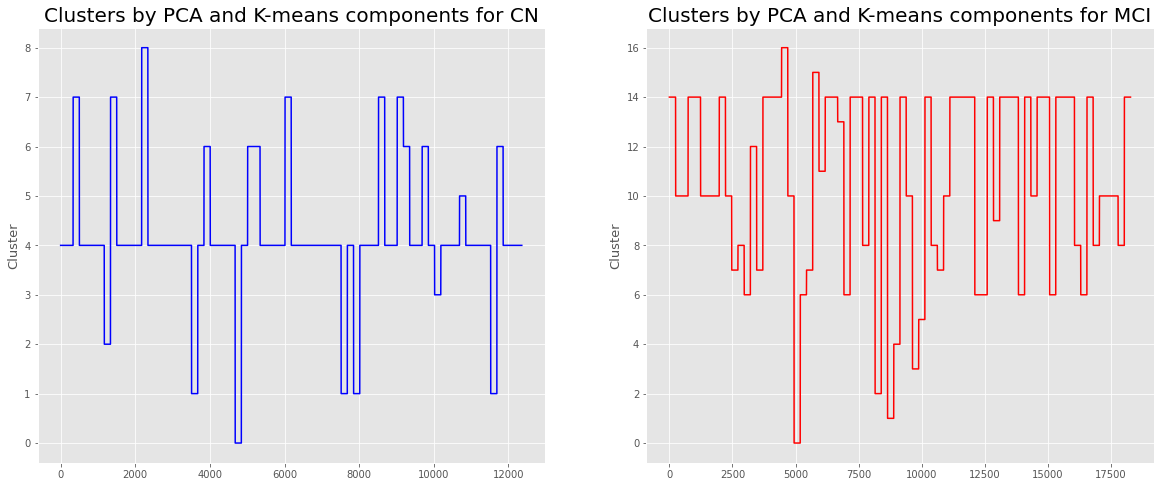

In [ ]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
df1_pca_kmeans['Segments k-means pca'].plot(kind = 'line', color = 'b')
plt.title('Clusters by PCA and K-means components for CN', fontsize = 20)
plt.ylabel('Cluster', fontsize = 13)

plt.subplot(1,2,2)
df2_pca_kmeans['Segments k-means pca'].plot(kind = 'line', color = 'r')
plt.title('Clusters by PCA and K-means components for MCI', fontsize = 20)
plt.ylabel('Cluster', fontsize = 13)
#plt.xlim((0,1000))

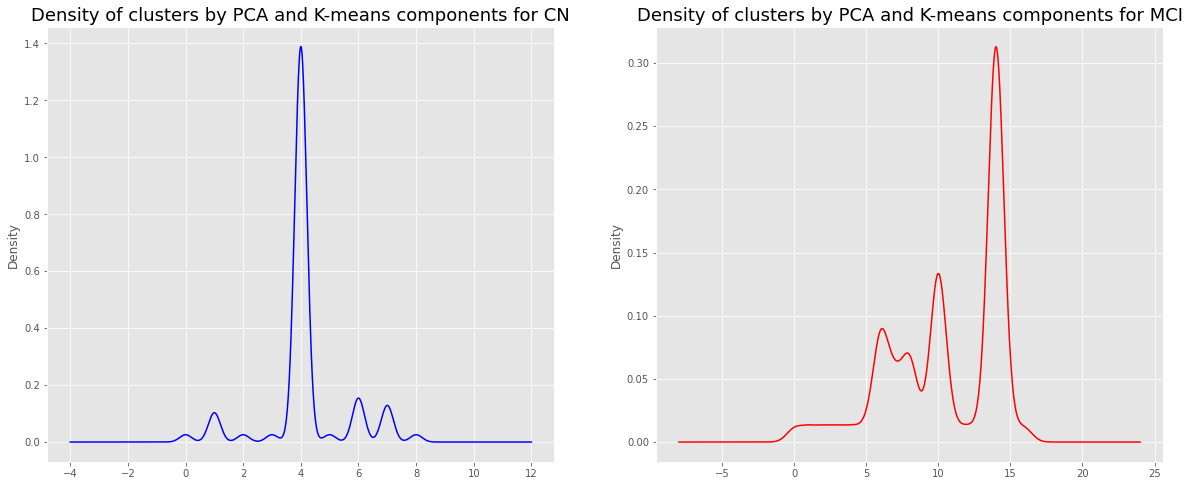

In [ ]:
plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
df1_pca_kmeans['Segments k-means pca'].plot(kind = 'density', color = 'b')
plt.title('Density of clusters by PCA and K-means components for CN', fontsize = 18)

plt.subplot(1,2,2)
df2_pca_kmeans['Segments k-means pca'].plot(kind = 'density', color = 'r')
plt.title('Density of clusters by PCA and K-means components for MCI', fontsize = 18)

plt.show()

In [ ]:
df1_pca_kmeans['Segments k-means pca'].value_counts()

4    9018
6    1002
7     835
1     668
2     167
8     167
0     167
3     167
5     167
Name: Segments k-means pca, dtype: int64

In [ ]:
df2_pca_kmeans['Segments k-means pca'].value_counts()

14    7657
10    3211
6     1976
8     1482
7      988
2      247
5      247
3      247
4      247
1      247
15     247
13     247
11     247
0      247
16     247
12     247
9      247
Name: Segments k-means pca, dtype: int64

## Linear Discriminant Analysis (LDA)








In [ ]:
from sklearn.model_selection import train_test_split

y1 = df1_pca_kmeans['Segments k-means pca']
X1 = df1.drop(columns = ['label'])

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=0)

y2 = df2_pca_kmeans['Segments k-means pca']
X2 = df2.drop(columns = ['label'])

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda1 = LDA(n_components = df1_pca_kmeans['Segments k-means pca'].max() )
X_train1 = lda1.fit_transform(X_train1, y_train1)
X_test1 = lda1.transform(X_test1)

lda2 = LDA(n_components = df2_pca_kmeans['Segments k-means pca'].max())
X_train2 = lda2.fit_transform(X_train2, y_train2)
X_test2 = lda2.transform(X_test2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier1 = RandomForestClassifier(max_depth=2, random_state=42)

classifier1.fit(X_train1, y_train1)
y_pred1 = classifier1.predict(X_test1)

classifier2 = RandomForestClassifier(max_depth=3, random_state=42)

classifier2.fit(X_train2, y_train2)
y_pred2 = classifier2.predict(X_test2)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy of CN: ' + str(accuracy_score(y_test1, y_pred1)))
print('Accuracy of MCI: ' + str(accuracy_score(y_test2, y_pred2)))

Accuracy of CN: 0.9352750809061489
Accuracy of MCI: 0.9280634573304157


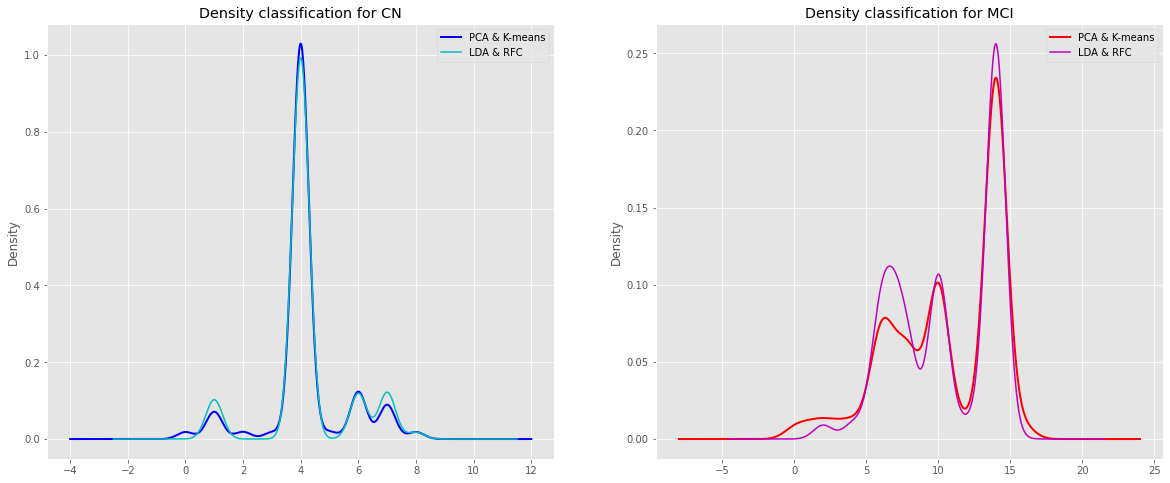

In [ ]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
y_test1.plot(kind = 'density', color = 'b', linewidth = 2, label = 'PCA & K-means')
pd.Series(y_pred1).plot(kind = 'density', color = 'c', label = 'LDA & RFC')
plt.title('Density classification for CN')
plt.legend()

plt.subplot(1,2,2)
y_test2.plot(kind = 'density', color = 'r', linewidth = 2, label = 'PCA & K-means')
pd.Series(y_pred2).plot(kind = 'density', color = 'm', label = 'LDA & RFC')
plt.title('Density classification for MCI')

plt.legend()
plt.show()